In [80]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import re

In [115]:
#change file name
path = "puzzle.sav"
file = open(path, "r")
desc = []
for line in file:
    print(line)
    text = line.strip().split(":")
    if text[0].strip() == "DESC":
        desc = re.findall('.', text[2].strip())
print(desc)
grid = np.zeros((7, 7), dtype=int)
i = 0
run = 0
for x in range(7):
    for y in range(7):
        c = '\0'
        
        if run == 0:
            c = desc[i]
            i = i + 1
            if c >= 'a' and c <= 'z':
                run = ord(c) - ord('a') + 1
        
        if run > 0:
            c = 'S'
            run = run - 1
            
        if c == '0' or c == '1' or c == '2' or c == '3' or c == '4':
            grid[x, y] = ord(c) - ord('0')
        elif c == 'B':
            grid[x, y] = -1
        elif c == 'S':
            grid[x, y] = -2
            

            
        
        
print(grid)

SAVEFILE:41:Simon Tatham's Portable Puzzle Collection

VERSION :1:1

GAME    :8:Light Up

PARAMS  :10:7x7b20s4d0

CPARAMS :10:7x7b20s4d0

SEED    :15:304364861695276

DESC    :17:i0a2cBcBiBc3cBa4i

NSTATES :1:1

STATEPOS:1:1

['i', '0', 'a', '2', 'c', 'B', 'c', 'B', 'i', 'B', 'c', '3', 'c', 'B', 'a', '4', 'i']
[[-2 -2 -2 -2 -2 -2 -2]
 [-2 -2  0 -2  2 -2 -2]
 [-2 -1 -2 -2 -2 -1 -2]
 [-2 -2 -2 -2 -2 -2 -2]
 [-2 -1 -2 -2 -2  3 -2]
 [-2 -2 -1 -2  4 -2 -2]
 [-2 -2 -2 -2 -2 -2 -2]]


In [98]:
grids = np.array([[-2,  5,  1, -2,  5, -2, -2],
                 [ 5, -2, -2,  0, -1, -2, -2],
                 [-2,  0, -2, -2, -2, -2,  2],
                 [-2,  0, -2, -1, -2, -1, -2],
                 [ 0, -2, -2, -2, -2,  1, -2],
                 [-2, -2,  3,  1, -2, -2, -2],
                 [-1, -2, -2, -2, -1, -2, -2]])


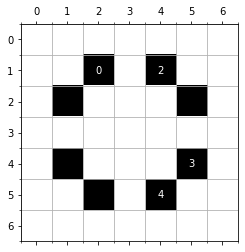

In [117]:
data = grid
for i in range(7):
    for j in range(7):
        v = data[i, j]
fig, ax = plt.subplots()
cmap = colors.ListedColormap(['white','black', 'black', 'black', 'black', 'black', 'black'])
cmap_sol = colors.ListedColormap(['white','black', 'black', 'black', 'black', 'black', 'black', 'white', 'yellow'])
ax.matshow(data, cmap=cmap)
for (i, j), z in np.ndenumerate(data):
    c = 'black'
    if z > -1:
        c = 'white'
    if z != -2:
        ax.text(j, i, z, color = c,ha='center', va='center')
    else:
        ax.text(j, i, ' ', color = c,ha='center', va='center')



plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
#ax.invert_yaxis()
plt.grid(which='minor')
plt.show()